Scikit-learn (sklearn) is a powerful open source machine learning library built on top of the Python programming language. This library contains a lot of efficient tools for machine learning and statistical modeling, including various classification, regression, and clustering algorithms.

In this article, I will show 6 tricks regarding the scikit-learn library to make certain programming practices a bit easier.

1. Generate random dummy data

To generate random ‘dummy’ data, we can make use of the make_classification() function in case of classification data, and make_regression() function in case of regression data. This is very useful in some cases when debugging or when you want to try out certain things on a (small) random data set.

Below, we generate 10 classification data points consisting of 4 features (found in X) and a class label (found in y), where the data points belong to either the negative class (0) or the positive class (1):

In [1]:
from sklearn.datasets import make_classification
import pandas as pd
X, y = make_classification(n_samples=10, n_features=4, n_classes=2, random_state=123)
# Here, X consists of the 4 feature columns for the generated data points:

In [2]:
pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4'])

# And y contains the corresponding label of each data point:

,Feature_1,Feature_2,Feature_3,Feature_4
0,-0.525038,-0.891119,-1.713221,1.315132
1,0.350666,0.780601,1.892239,-1.453395
2,-0.128317,-0.408917,-1.189686,0.914115
3,1.422256,1.031467,-0.935643,0.724513
4,-1.043645,-1.322303,-1.594203,1.221731
5,0.794175,0.935251,0.926843,-0.709606
6,-0.773266,-0.353686,1.344147,-1.036172
7,-0.992341,-0.860456,0.084953,-0.068954
8,-0.152253,0.411750,2.206481,-1.696821
9,-1.543099,-1.470873,-0.403813,0.304769


In [3]:
pd.DataFrame(y, columns=['Label'])

,Label
0,0
1,1
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,0


2. Impute missing values

Scikit-learn offers multiple ways to impute missing values. Here, we consider two approaches. The SimpleImputer class provides basic strategies for imputing missing values (through the mean or median for example). A more sophisticated approach the KNNImputer class, which provides imputation for filling in missing values using the K-Nearest Neighbors approach. Each missing value is imputed using values from the n_neighbors nearest neighbors that have a value for the particular feature. The values of the neighbors are averaged uniformly or weighted by distance to each neighbor.
Below, we show an example application using both imputation methods:

In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.datasets import make_classification
import pandas as pd
X, y = make_classification(n_samples=5, n_features=4, n_classes=2, random_state=123)
X = pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4'])
print(X.iloc[1,2])

2.2129830531512615


In [ ]:
Transform X[1, 2] to a missing value:

In [5]:
X.iloc[1, 2] = float('NaN')
X

,Feature_1,Feature_2,Feature_3,Feature_4
0,0.070111,-0.727615,1.904188,-1.966186
1,0.410745,0.155161,NaN,-2.791157
2,-0.337408,-1.069994,0.090022,0.430782
3,-0.334743,-0.528369,-0.989942,1.480690
4,0.336622,1.802785,-1.578173,1.022805


In [ ]:
First we make use of the simple imputer:

In [6]:
imputer_simple = SimpleImputer()

pd.DataFrame(imputer_simple.fit_transform(X))

,0,1,2,3
0,0.070111,-0.727615,1.904188,-1.966186
1,0.410745,0.155161,-0.143476,-2.791157
2,-0.337408,-1.069994,0.090022,0.430782
3,-0.334743,-0.528369,-0.989942,1.480690
4,0.336622,1.802785,-1.578173,1.022805


In [ ]:
Resulting in a value of -0.143476.

In [ ]:
Next, we try the KNN imputer, where the 2 nearest neighbors are considered and the neighbors are weighted uniformly:

In [7]:
imputer_KNN = KNNImputer(n_neighbors=2, weights="uniform")
pd.DataFrame(imputer_KNN.fit_transform(X))

,0,1,2,3
0,0.070111,-0.727615,1.904188,-1.966186
1,0.410745,0.155161,0.997105,-2.791157
2,-0.337408,-1.069994,0.090022,0.430782
3,-0.334743,-0.528369,-0.989942,1.480690
4,0.336622,1.802785,-1.578173,1.022805


In [ ]:
Resulting in a value of 0.997105 (= 0.5*(1.904188+0.090022)).

3. Make use of Pipelines to chain multiple steps together

The Pipeline tool in scikit-learn is very helpful to simplify your machine learning models. Pipelines can be used to chain multiple steps into one, so that the data will go through a fixed sequence of steps. Thus, instead of calling every step separately, the pipeline concatenates all steps into one system. To create such a pipeline, we make use of the make_pipeline function.

Below, a simple example is shown, where the pipeline consists of an imputer, which imputes missing values (if there are any), and a logistic regression classifier.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
import pandas as pd
X, y = make_classification(n_samples=25, n_features=4, n_classes=2, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

imputer = SimpleImputer()
clf = LogisticRegression()

pipe = make_pipeline(imputer, clf)

Now, we can use the pipeline to fit our training data and to make predictions for the test data. First, the training data goes through to imputer, and then it starts training using the logistic regression classifier. Then, we are able to predict the classes for our test data:

In [10]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
pd.DataFrame({'Prediction': y_pred, 'True': y_test})

,Prediction,True
0,0,0
1,0,0
2,1,1
3,1,1
4,0,1


4. Save a Pipeline model using joblib

Pipeline models created through scikit-learn can easily be saved by making use of joblib. In case your model contains large arrays of data, each array is stored in a separate file. Once saved locally, one can easily load (or, restore) their model for use in new applications.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
import joblib
X, y = make_classification(n_samples=20, n_features=4, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

imputer = SimpleImputer()
clf = LogisticRegression()

pipe = make_pipeline(imputer, clf)

pipe.fit(X_train, y_train)
joblib.dump(pipe, 'pipe.joblib')

['pipe.joblib']

Now, the fitted pipeline model is saved (dumped) on your computer through joblib.dump. This model is restored through joblib.load, and can be applied as usual afterwards:

5. Plot a confusion matrix

A confusion matrix is a table that is used to describe the performance of a classifier on a set of test data. Here, we focus on a binary classification problem, i.e., there are two possible classes that observations could belong to: “yes” (1) and “no” (0).

Let’s create an example binary classification problem, and display the corresponding confusion matrix, by making use of the plot_confusion_matrix function:

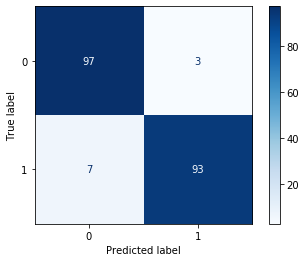

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

clf = LogisticRegression()

clf.fit(X_train, y_train)

confmat = plot_confusion_matrix(clf, X_test, y_test, cmap="Blues")

Here, we have visualized in a nice way through the confusion matrix that there are:
93 true positives (TP);
97 true negatives (TN);
3 false positives (FP);
7 false negatives (FN).
So, we have reached an accuracy score of (93+97)/200 = 95%.

6. Visualize decision trees

One of the most well known classification algorithms is the decision tree, characterized by its tree-like visualizations which are very intuitive. The idea of a decision tree is to split the data into smaller regions based on the descriptive features. Then, the most commonly occurring class amongst training observations in the region to which the test observation belongs is the prediction. To decide how the data is split into regions, one has to apply a splitting measure to determine the relevance and importance of each of the features. Some well known splitting measures are Information Gain, Gini index and Cross-entropy.

Below, we show an example on how to make use of the plot_tree function in scikit-learn:

[Text(167.4, 190.26, 'X[1] <= -0.052\ngini = 0.499\nsamples = 40\nvalue = [19, 21]'),
 Text(83.7, 135.9, 'X[1] <= -0.588\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(41.85, 81.53999999999999, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 1.077\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(83.7, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 135.9, 'X[3] <= 1.001\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(209.25, 81.53999999999999, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(292.95, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

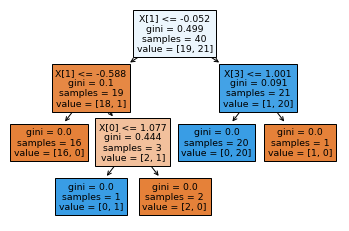

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=50, n_features=4, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

plot_tree(clf, filled=True)

In this example, we are fitting a decision tree on 40 training observations, that belong to either the negative class (0) or the positive class (1), so we are dealing with a binary classification problem. In the tree, we have two kinds of nodes, namely internal nodes (nodes where the predictor space is split further) or terminal nodes (end point). The segments of the trees that connect two nodes are called branches.

Let‘s have a closer look at the information provided for each node in the decision tree:

The splitting criterion used in the particular node is shown as e.g. ‘F2 <= -0.052’. This means that every data point that satisfies the condition that the value of the second feature is below -0.052 belongs to the newly formed region to the left, and the data points that do not satisfy the condition belong to the region to the right of the internal node.

The Gini index is used as splitting measure here. The Gini index (called a measure of impurity) measures the degree or probability of a particular element being wrongly classified when it is randomly chosen.

The ‘samples’ of the node indicates how many training observations are found in the particular node.

The ‘value’ of the node indicates the number of training observations found in the negative class (0) and the positive class (1) respectively. So, value=[19,21] means that 19 observations belong to the negative class and 21 observations belong to the positive class in that particular node.

Conclusion

This article covered 6 useful scikit-learn tricks to improve your machine learning models in sklearn. I hope these tricks have helped you in some way, and I wish you good luck on your next project when making use of the scikit-learn library!